# Chapter 1 : The Python Data Model

## A Pythonic Card Deck
demonstrates the power of implementing just two special methods, `__getitem__` and `__len__`.

In [1]:
# example : A deck as a sequence of playing cards

import collections

Card = collections.namedtuple('Card', ['rank', 'suit']) # creates a new subclass of tuple

class FrenchDeck:

  ranks = [str(n) for n in range(2, 11)] + list('JQKA')
  suits = 'spades diamonds clubs hearts'.split()

  def __init__(self):
    self._cards = [Card(rank, suit) for suit in self.suits
                                    for rank in self.ranks]

  def __len__(self):
    return len(self._cards)

  def __getitem__(self, position):
    return self._cards[position]

In [2]:
beer_card = Card('7', 'diamonds')
beer_card

Card(rank='7', suit='diamonds')

In [3]:
deck = FrenchDeck()
len(deck)

52

In [4]:
print(deck[0])
print(deck[-1])

Card(rank='2', suit='spades')
Card(rank='A', suit='hearts')


In [6]:
# what if we want to randomly pick a card?
from random import choice

choice(deck)

Card(rank='3', suit='spades')

In [8]:
choice(deck)

Card(rank='9', suit='spades')

In [9]:
# deck supports slicing
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [11]:
deck[12::13]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

In [ ]:
# by implementing the __getitem__ special method, deck is also iterable
for card in deck:
  print(card)

#also iterate over the deck in reverse:
for card in reversed(deck):
  print(card)

# A simple two-dimensional vector class
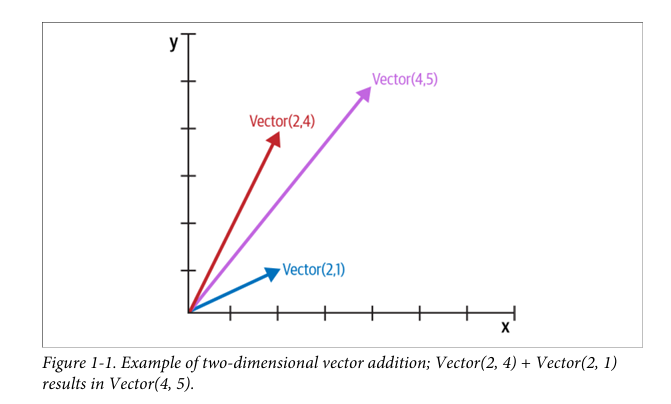

In [17]:
import math

class Vector:
  def __init__(self, x=0, y=0):
    self.x = x
    self.y = y

  def __repr__(self):
    return f'Vector({self.x!r}, {self.y!r})'

  def __abs__(self):
    return math.hypot(self.x, self.y)

  def __bool__(self):
    return bool(abs(self))

  def __add__(self, other):
    x = self.x + other.x
    y = self.y + other.y
    return Vector(x, y)

  def __mul__(self, scalar):
    return Vector(self.x * scalar, self.y * scalar)

In [18]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)

v1 + v2

Vector(4, 5)

### Note:
the f-string in our `__repr__` uses `!r` to get the standard representation of the attribute to be displayed.

1. **Accuracy of Representation:** Using !r ensures that the string representation includes all the necessary details to understand or recreate the object. For example, string objects are enclosed in quotes, which distinguishes them from other types of objects. This level of detail is particularly useful for debugging.

2. **Consistency with __repr__ Objective:** The purpose of __repr__ is to provide an unambiguous string representation of an object that, when fed back into Python, would ideally recreate the object. Using !r aligns with this objective by ensuring that the output of __repr__ is precise and potentially executable Python code.

3. **Handling Special Characters and Types:** When dealing with complex objects or strings containing special characters (like newlines or quotes), !r ensures that these are properly represented in the output string. This makes the output more accurate and useful for understanding the object's state

In [19]:
#Without !r (using str() by default):
class MyClass:
    def __init__(self, value):
        self.value = value

    def __repr__(self):
        return f"MyClass({self.value})"

obj = MyClass("Hello\nWorld")
print(repr(obj))  # Output: MyClass(Hello
                  # World)


MyClass(Hello
World)


In [20]:
#With !r (using repr()):
class MyClass:
    def __init__(self, value):
        self.value = value

    def __repr__(self):
        return f"MyClass({self.value!r})"

obj = MyClass("Hello\nWorld")
print(repr(obj))  # Output: MyClass('Hello\nWorld')


MyClass('Hello\nWorld')


# Collection API

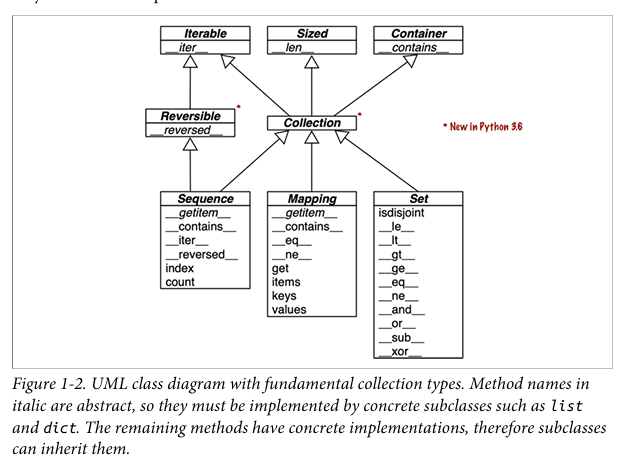

The `Collection` ABC(anstract base classes) unifies the three essential interfaces that every collection should implement:

* `Iterable` to support for, unpacking, and other forms of iteration
* `Sized` to support the `len` built-in function
* `Container` to support the `in` operator

Three very important specializations of `Collection` are:

* `Sequence`, formalizing the interface of built-ins like `list` and `str`
* `Mapping`, implemented by `dict`,collections.defaultdict, etc
* `Set`, the interface of the `set` and `frozenset` built-in types

Only `sequence` is Reversible, because sequence support arbitrary ordering of their contents, while mappings and sets do not.